# MODELIZACIÓN REGRESION LOSS GIVEN DEFAULT

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto =  'C:/Users/Ana/Desktop/DATA_SCIENCE_FOR_BUSINESS/PYTHON_DATA_SCIENCE_MASTERY/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS_/03_SCORING RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre = 'df_tablon_lgd.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

## CREAR X e Y

In [5]:
x = df.drop(columns='target_lgd')
y = df.target_lgd

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [9]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,54.50,1.12,1.41,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.37,0.00,1
1,53.90,0.14,1.39,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,2
2,55.66,1.11,1.36,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.37,0.00,3
3,56.67,1.20,1.39,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.38,0.00,4
4,56.86,0.22,1.43,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.38,-0.38,-0.38,-0.38,0.00,5
5,54.26,2.22,1.33,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.38,0.00,6
6,56.17,1.32,1.39,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.38,-0.38,0.00,7
7,54.23,1.15,1.44,0.06,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.38,0.00,8
8,49.04,7.22,1.35,0.10,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.38,-0.38,-0.38,-0.38,0.00,9
9,53.10,0.49,1.38,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.38,-0.38,-0.38,-0.38,0.00,10


In [10]:
modelo_lgd = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 20,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.25)
modelo_lgd.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=20,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [11]:
pred = modelo_lgd.predict(val_x)

Corregimos los máximos y mínimos.

In [12]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evaluar sobre validación

In [13]:
mean_absolute_error(val_y, pred)

0.37161133522963463

## REPORTING DEL MODELO

In [14]:
check_validacion = pd.DataFrame({'lgd_real':val_y, 'lgd_pred':pred})
check_validacion

,lgd_real,lgd_pred
id_cliente,,
79691260,0.00,0.26
134528480,1.00,0.80
42571137,0.00,0.49
55920137,0.00,0.22
130698833,1.00,0.61
...,...,...
56009425,0.00,0.11
77298639,0.00,0.41
46733269,0.00,0.32


In [15]:
check_validacion.corr()

,lgd_real,lgd_pred
lgd_real,1.00,0.53
lgd_pred,0.53,1.00


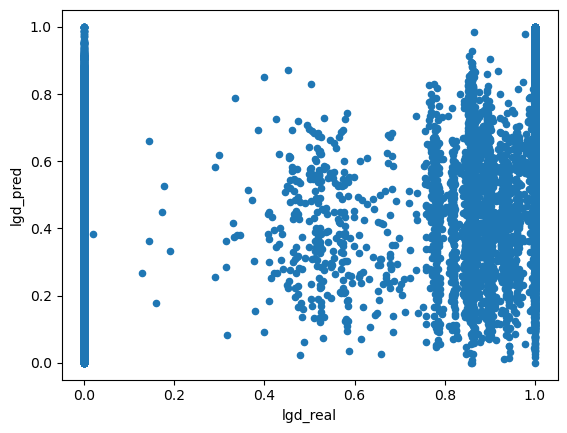

In [16]:
check_validacion.plot.scatter(x='lgd_real',y='lgd_pred');

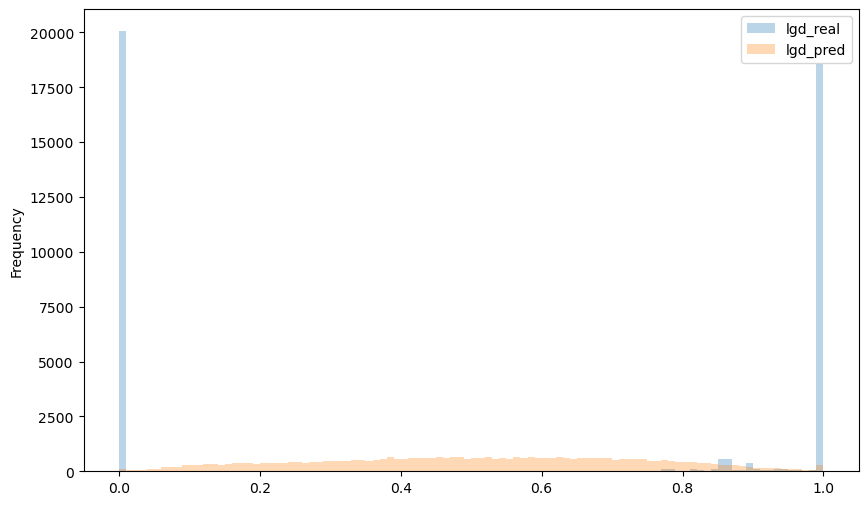

In [17]:
check_validacion.plot.hist(bins = 100,figsize = (10,6), alpha = 0.3);